<a href="https://colab.research.google.com/github/TonyKimisintheHouse/Self-Study-ML-Fundamentals-and-DL/blob/master/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

## Creating Toy Dataset

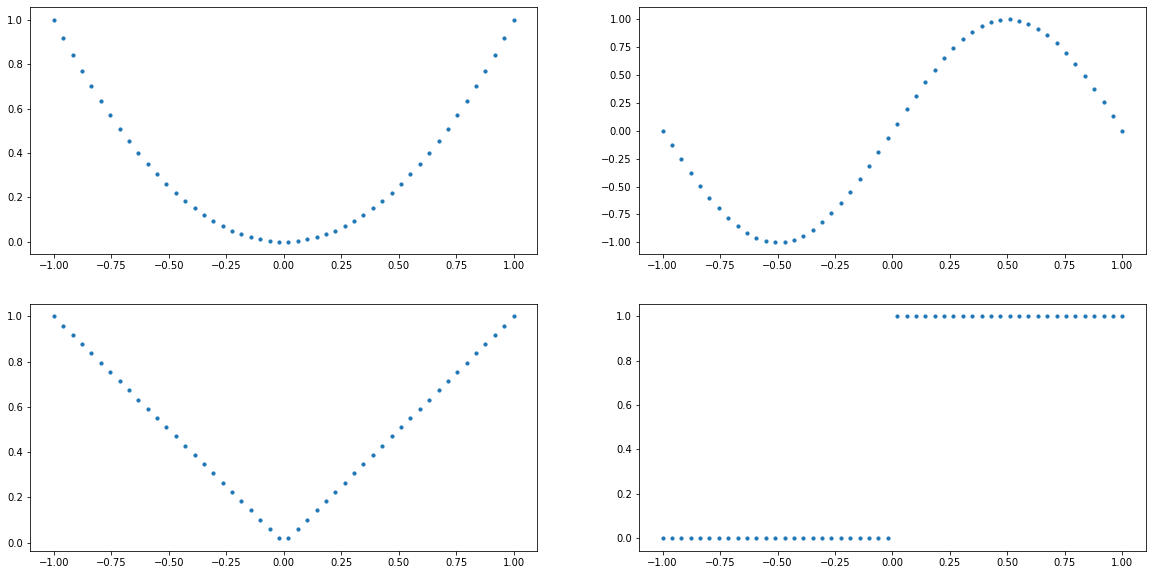

In [11]:
import numpy as np

def create_toy_dataset(func, sample_size = 50):
  x = np.linspace(-1, 1, sample_size)[:, None]
  return x, func(x)

def sinusoidal(x):
  return np.sin(np.pi * x)

def heaviside(x):
  return 0.5 * (np.sign(x) + 1)

func_list = [np.square, sinusoidal, np.abs, heaviside]
plt.figure(figsize=(20, 10))
x = np.linspace(-1, 1, 1000)[:, None]
for i, func, n_iter in zip(range(1, 5), func_list, [1000, 10000, 10000, 10000]):
  plt.subplot(2, 2, i)
  x_train, y_train = create_toy_dataset(func)
  plt.scatter(x_train, y_train, s=10)

plt.show()

## Model

*In process of implementing the model. This website looks promising: https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e*

In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden)
    self.predict = torch.nn.Linear(n_hidden, n_output)

  def forward(self, x):
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x